# 1.7 Creating network visualizations

## Installing libraries and importing files

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [11]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_relationship.csv', index_col = 0)

In [14]:
relationship_df

,source,target,value
0,Austria,France,6
1,Austria,Hungary,6
2,Hungary,Russia,5
3,Germany,Russia,21
4,Germany,Italy,25
...,...,...,...
77,Greece,Italy,2
78,Italy,Japan,6
79,Romania,Russia,6
80,India,Lebanon,1


## Create a network object from the countries relationships dataframe

In [19]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## Create a static network graph using only NetworkX

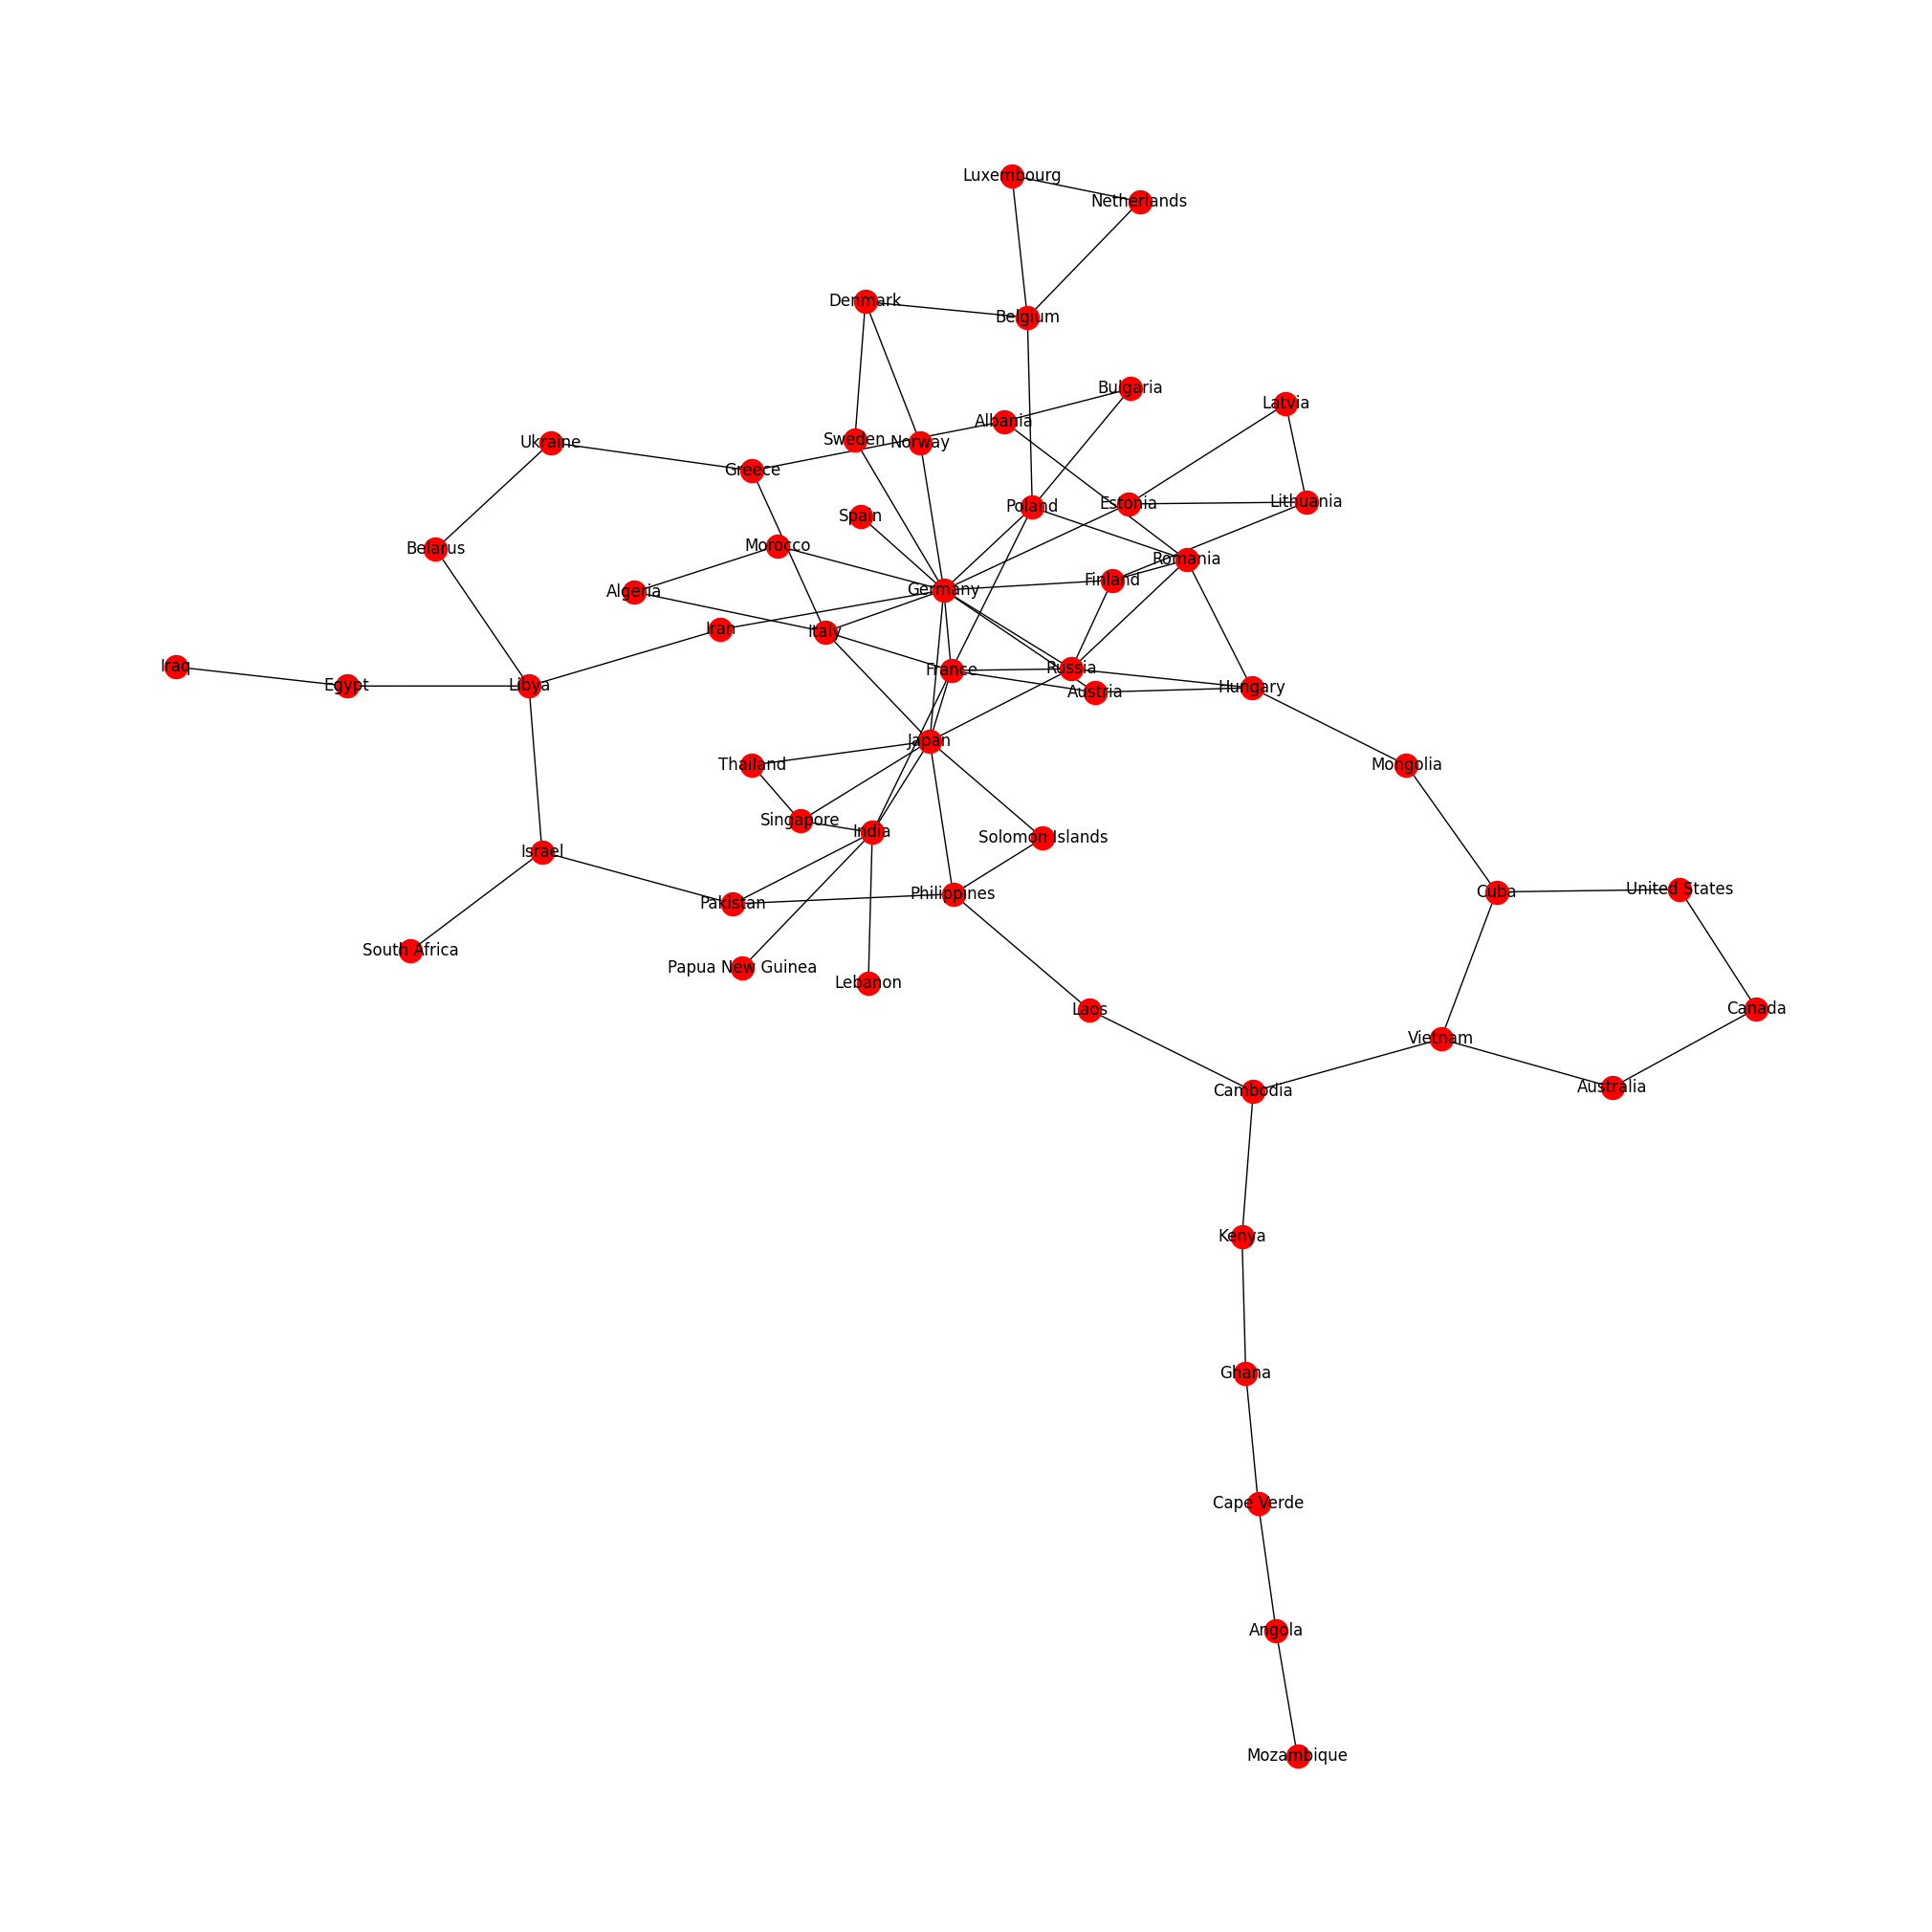

In [27]:
h = plt.figure(figsize = (20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

## Build an interactive network graph from the network object using pyvis and save as an HTML file

In [34]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Apply the Leiden algorithm to detect any communities within the countries

In [41]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [44]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [47]:
new_com = coms.to_node_community_map()

In [50]:
new_com

defaultdict(list,
            {'Japan': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Solomon Islands': [0],
             'Philippines': [0],
             'India': [0],
             'Pakistan': [0],
             'Israel': [0],
             'South Africa': [0],
             'Papua New Guinea': [0],
             'Lebanon': [0],
             'Austria': [1],
             'France': [1],
             'Hungary': [1],
             'Russia': [1],
             'Poland': [1],
             'Finland': [1],
             'Albania': [1],
             'Romania': [1],
             'Bulgaria': [1],
             'Germany': [2],
             'Italy': [2],
             'Spain': [2],
             'Denmark': [2],
             'Norway': [2],
             'Sweden': [2],
             'Morocco': [2],
             'Algeria': [2],
             'Greece': [3],
             'Ukraine': [3],
             'Belarus': [3],
             'Libya': [3],
             'Egypt': [3],
             

In [54]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

## Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell.

In [59]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Based on the historical and geopolitical context, the partition does indeed make sense.
Germany's central position and numerous connections highlight its significant role in international relations, economics, and trade. It acts as a hub connecting various regions. 
The clusters suggest natural regional groupings based on historical, cultural, and economic ties. For instance, European countries tend to cluster together, as do Asian countries and North American countries. The connections between different clusters highlight global interdependence. Lastly, the nodes with multiple connections across different clusters indicate influential countries with widespread interactions. 

## Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.

### Degree centrality

In [66]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Austria': 0.05660377358490566,
 'France': 0.1320754716981132,
 'Hungary': 0.07547169811320754,
 'Russia': 0.11320754716981132,
 'Germany': 0.24528301886792453,
 'Italy': 0.09433962264150943,
 'Spain': 0.018867924528301886,
 'Poland': 0.09433962264150943,
 'Estonia': 0.05660377358490566,
 'Latvia': 0.03773584905660377,
 'Lithuania': 0.05660377358490566,
 'Finland': 0.07547169811320754,
 'Belgium': 0.07547169811320754,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Denmark': 0.05660377358490566,
 'Norway': 0.03773584905660377,
 'Sweden': 0.03773584905660377,
 'Albania': 0.05660377358490566,
 'Greece': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.018867924528301886,
 'Japan': 0.16981132075471697,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'Thailand': 0.03773584905660377,
 'Singapore': 0.05660377358490566,
 'Solomon Islands

In [69]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [72]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

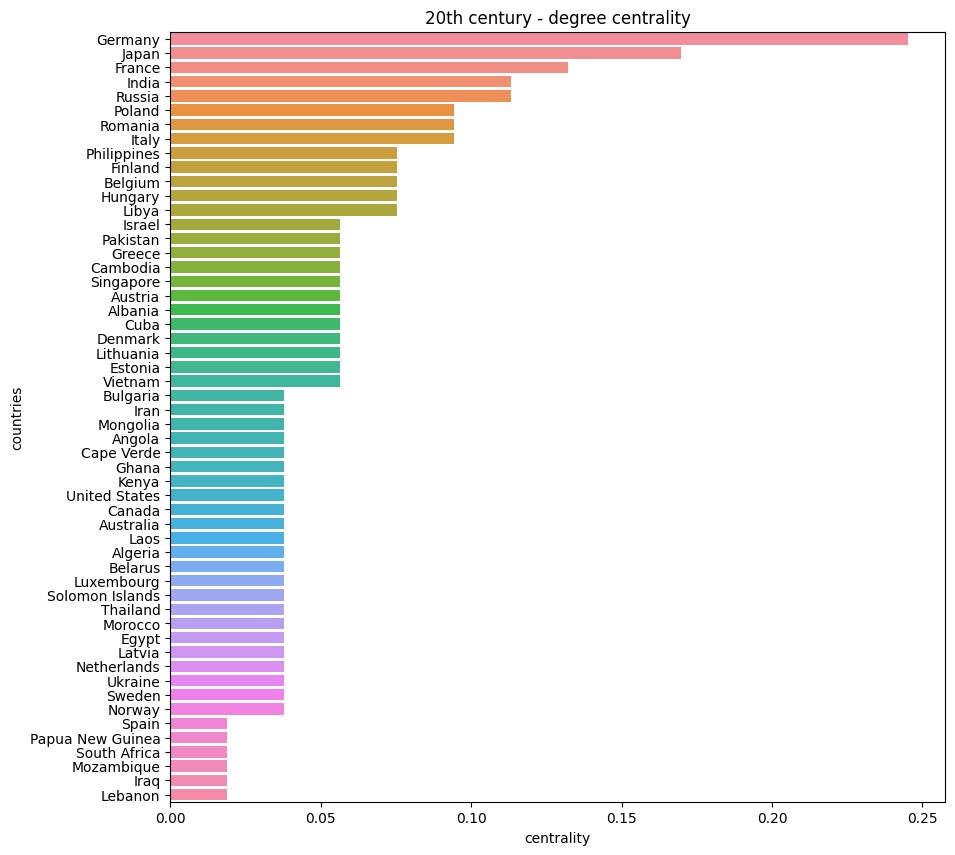

In [79]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th century - degree centrality")

Degree centrality measures the number of direct connections a node has. Countries with high degree centrality are highly connected and act as hubs within the network. In this case, Germany acts as a central hub for all other countries.

### Closeness centrality

In [83]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [86]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

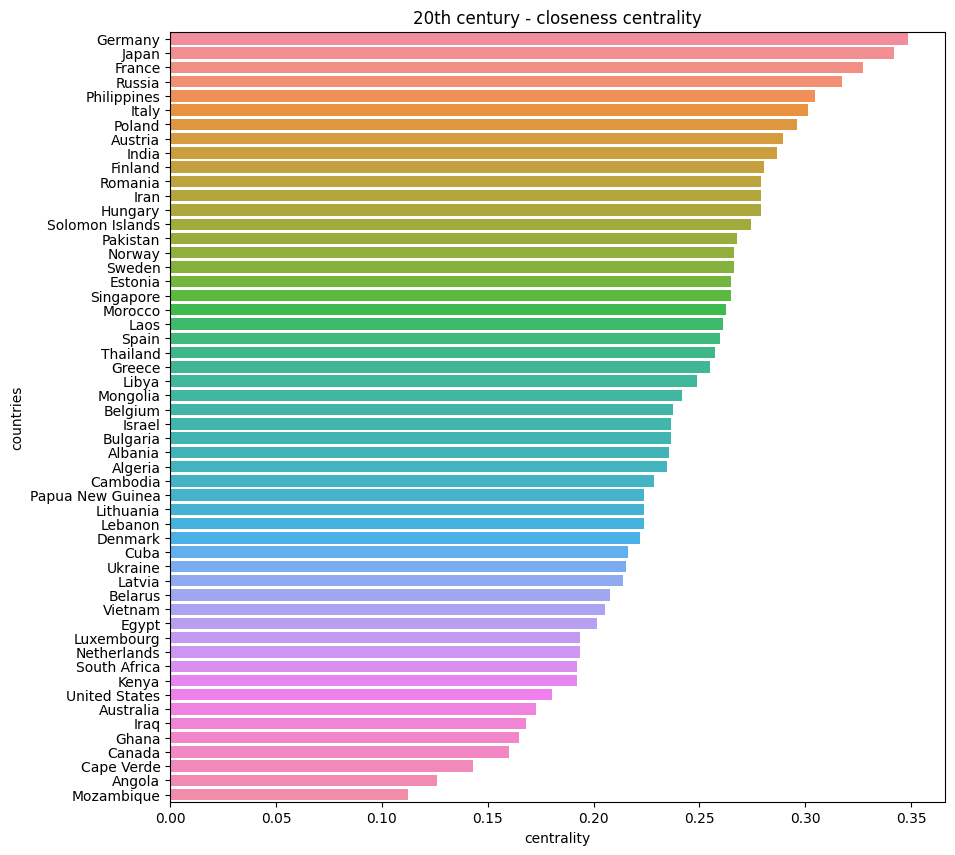

In [89]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th century - closeness centrality")

Closeness centrality measures how close a node is to all other nodes in the network. Countries with high closeness centrality can quickly interact with other countries. In this case all countries are very closely connected due to the historical events that happened during 20th century.

### Betweenness centrality

In [95]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [98]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

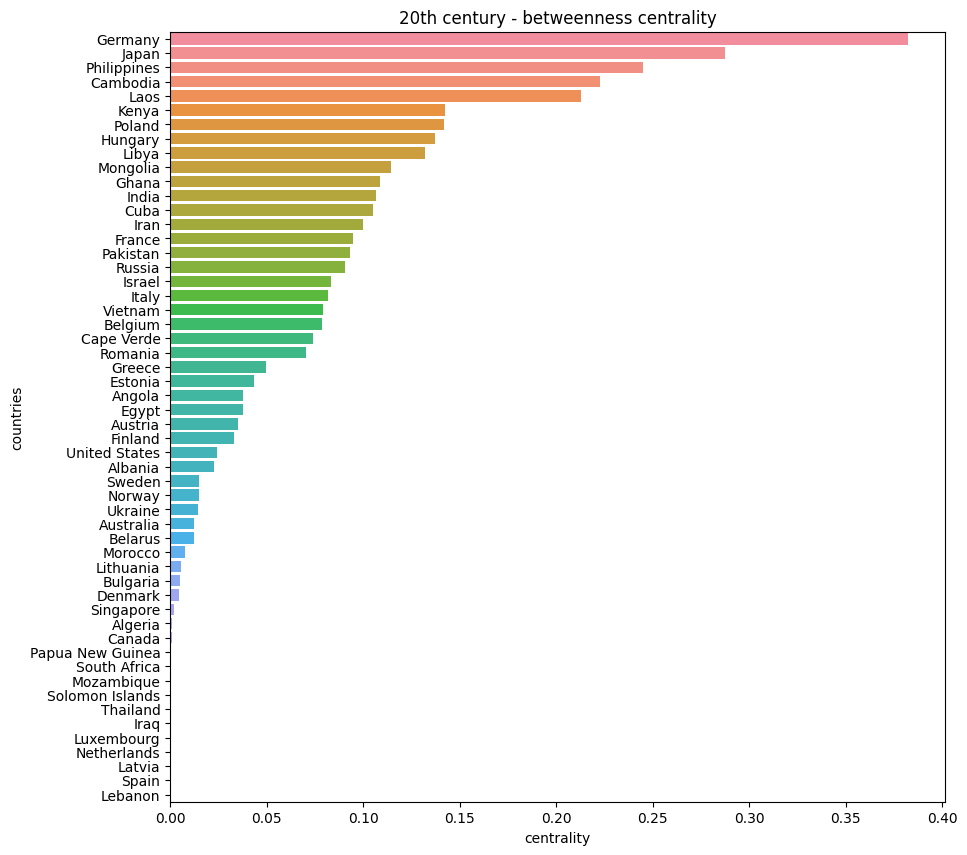

In [101]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th century - betweenness centrality")

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes. Countries with high betweenness centrality asct as bridges or intermediaries. In this case, Germany and Japan appear as key players in the 20th century events. 